In [1]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob

In [2]:
coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')  

<AxesSubplot:>

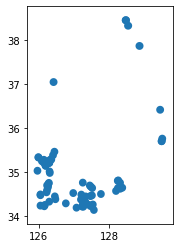

In [3]:
buffer =gpd.read_file('./Ex/211228/버퍼10km.shp', encoding='euckr')
buffer.plot()


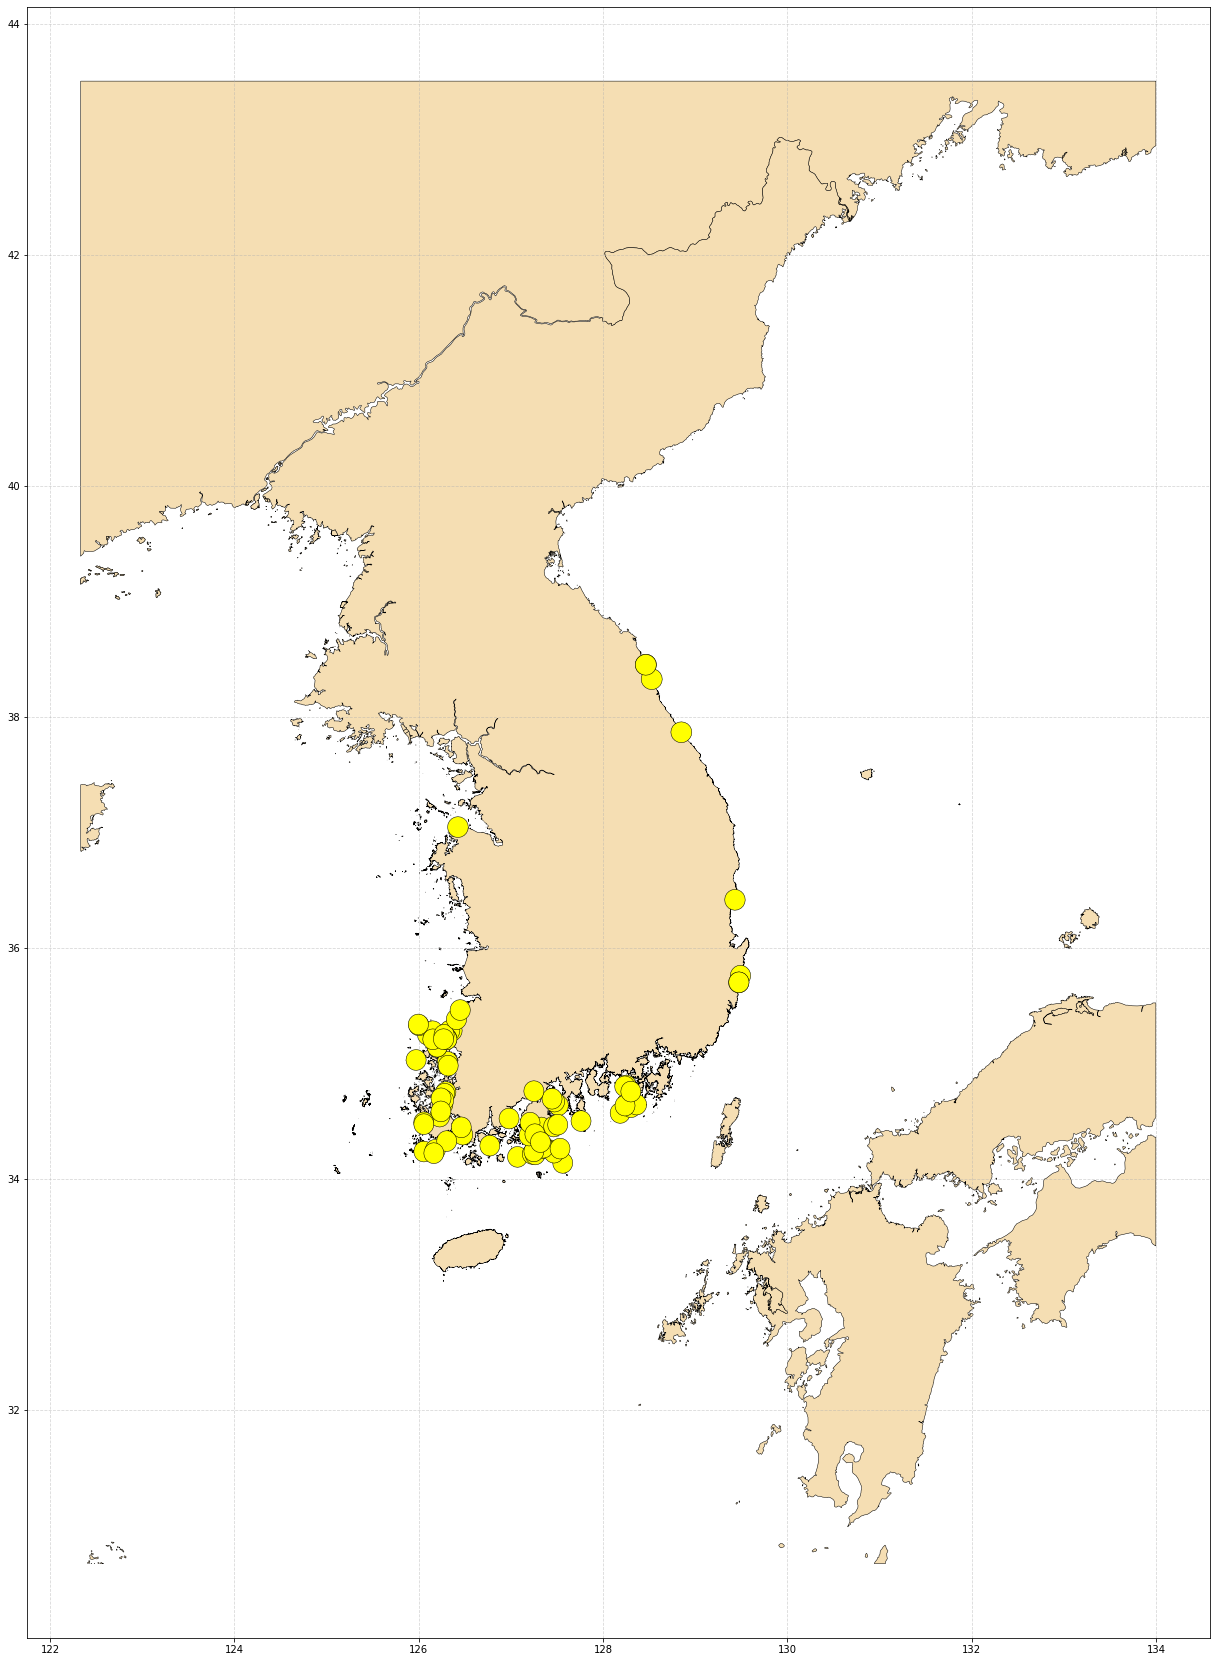

In [5]:
ax = buffer.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=2)
coastline.plot(facecolor='wheat', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)
plt.grid(True, alpha=0.5, linestyle='--')

In [4]:
flist = glob.glob('./Ex/211228/법정구역/*.shp')

In [47]:
def bufferTrue(buffer):
    if buffer in bufferlist:
        print(buffer)
        return 1
    else:
        return 0

In [68]:
table = buffer[['번호','Y','X']]
for fname in flist:
    print(fname)
    try:
        data = gpd.read_file(fname, encoding='euckr')
        data = data.to_crs(epsg=4326)
    except Exception as e:
        data = gpd.read_file(fname, encoding='utf8')
        data = data.to_crs(epsg=4326)
        print(e, fname)
    
    # sspatial join
    result1 = gpd.sjoin(buffer, data, how='inner', op='intersects')
    # save results
    try:
        result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')

        
        bufferlist = result1['번호'].tolist()
        
        # table[fname.split("\\")[1][:-4]] = 1
        table[fname.split("\\")[1][:-4]] =  table['번호'].apply(bufferTrue)
    except Exception as e:
        print(e)
        pass

table['합계'] = table[table.columns.tolist()[3:]].sum(axis=1)
table.to_csv('table.csv', index=False, encoding='euckr')
    #plot data
    # ax = buffer.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=2)
    # data.plot(facecolor='powderblue', edgecolor='black',linewidth=0.5, zorder=3, ax= ax)
    # result1.plot(facecolor='red', edgecolor='black',linewidth=0.5, zorder=4, ax= ax)
    # coastline.plot(facecolor='wheat', edgecolor='black',ax=ax, zorder=1, linewidth=0.5)
    # plt.savefig('./result/test'+fname.split("\\")[1][:-4]+'.png')

./Ex/211228/법정구역\골재채취단지.shp
Cannot write empty DataFrame to file.
./Ex/211228/법정구역\국립공원.shp
8
9
10
12
22
23
31
38
40
41
42
43
46
48
57
58
60
61
64
./Ex/211228/법정구역\군립공원.shp
Cannot write empty DataFrame to file.
./Ex/211228/법정구역\깊은수심항로.shp
50
59
63
./Ex/211228/법정구역\도립공원.shp


C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[fname.split("\\")[1][:-4]] =  table['번호'].apply(bufferTrue)
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:22: Sett

17
18
45
72
73
./Ex/211228/법정구역\마을어업.shp


C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[fname.split("\\")[1][:-4]] =  table['번호'].apply(bufferTrue)
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')


1
2
3
4
5
6
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
./Ex/211228/법정구역\문화재구역.shp
19
20
21
22
27
31
42
43
48
49
56
57
62
67
69
70
71
72
73
74
75
./Ex/211228/법정구역\문화재보호구역.shp
22
./Ex/211228/법정구역\생태경관보전지역.shp


C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[fname.split("\\")[1][:-4]] =  table['번호'].apply(bufferTrue)
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

41
42
46
./Ex/211228/법정구역\습지보호지역.shp
'euc_kr' codec can't decode byte 0xa0 in position 4: illegal multibyte sequence ./Ex/211228/법정구역\습지보호지역.shp
17
18
19
20
21
45
50
51
52
53
54
59
60
61
63
68
71
72
73
75
78
./Ex/211228/법정구역\양길항로.shp
50
51
52
53
54
59
60
61
63
79
./Ex/211228/법정구역\양식어업.shp


C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[fname.split("\\")[1][:-4]] =  table['번호'].apply(bufferTrue)
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

1
2
3
4
5
6
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
38
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
66
68
69
70
71
72
73
74
75
76
78
79
./Ex/211228/법정구역\요트항로.shp


C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[fname.split("\\")[1][:-4]] =  table['번호'].apply(bufferTrue)
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')


3
8
9
12
13
14
15
16
19
22
23
26
30
32
33
34
36
37
38
40
41
43
46
47
48
50
51
52
53
54
55
56
57
58
59
63
64
65
66
67
76
79
./Ex/211228/법정구역\일반항로.shp
22
./Ex/211228/법정구역\자연환경보전지역.shp


C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[fname.split("\\")[1][:-4]] =  table['번호'].apply(bufferTrue)
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

5
6
8
9
10
11
12
17
18
20
21
22
23
24
27
31
38
40
41
42
43
44
45
46
48
49
57
58
60
61
64
68
69
70
71
72
73
74
75
./Ex/211228/법정구역\정치망어업.shp
1
2
3
4
5
6
8
9
10
11
12
14
15
16
38
62
./Ex/211228/법정구역\정치성구획어업.shp


C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[fname.split("\\")[1][:-4]] =  table['번호'].apply(bufferTrue)
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: User

3
8
12
13
14
15
16
./Ex/211228/법정구역\지방청 고시항로.shp
22
50
51
52
53
54
59
60
61
63
79
./Ex/211228/법정구역\지정항로.shp
Cannot write empty DataFrame to file.
./Ex/211228/법정구역\천연기념물.shp
13
15
16
22
27
43
48
49
57
67
69
70
71
74
75
./Ex/211228/법정구역\천연보호구역.shp
Cannot write empty DataFrame to file.
./Ex/211228/법정구역\통항제한금지구역.shp


C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')


38
./Ex/211228/법정구역\해양보호구역_경관.shp
Cannot write empty DataFrame to file.
./Ex/211228/법정구역\해양보호구역_생물.shp
Cannot write empty DataFrame to file.
./Ex/211228/법정구역\해양보호생물서식지.shp
1
3
4
13
17
18
20
21
22
24
27
40
41
42
43
44
45
48
49
51
55
56
57
59
63
69
70
71
72
73
74
75
77
79
./Ex/211228/법정구역\해중경관지구.shp
2
./Ex/211228/법정구역\환경보전해역.shp
17
18
20
21
22
24
27
38
42
44
45
49
55
69
70
71
72
73
74
75


C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')
C:\Users\PPARK\AppData\Local\Temp/ipykernel_5756/1383869588.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex3/'+fname.split("\\")[1][:-4]+'.shp', encoding='euckr')


In [67]:

table

,번호,Y,X,국립공원,깊은수심항로,도립공원,마을어업,문화재구역,문화재보호구역,생태경관보전지역,...,자연환경보전지역,정치망어업,정치성구획어업,지방청 고시항로,천연기념물,통항제한금지구역,해양보호생물서식지,해중경관지구,환경보전해역,합계
0,1,38.451374,128.463611,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,8
1,2,38.326051,128.527295,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,8
2,3,37.866497,128.848489,0,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,12
3,4,38.450057,128.463007,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,8
4,5,34.571411,128.185009,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,75,35.209975,126.268447,0,0,0,1,1,0,0,...,1,0,0,0,1,0,1,0,1,16
74,76,35.336935,125.995235,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
75,77,35.382359,126.408741,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,4
76,78,35.461900,126.449200,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6


<AxesSubplot:>

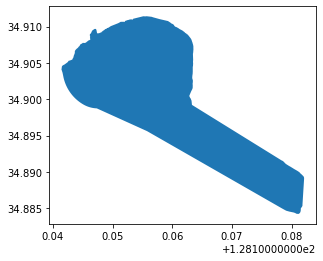

In [31]:
result1 = gpd.sjoin(buffer, data, how='left', op='intersects')
result1.plot()


<AxesSubplot:>

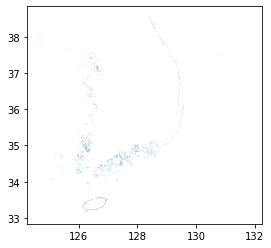

In [65]:
data = gpd.read_file('./Ex/211228/법정구역\마을어업.shp', encoding='euckr')
data.plot()

In [68]:
data.geometry.unique()

<GeometryArray>
[          <shapely.geometry.polygon.Polygon object at 0x000001CC064DCE20>,
 ...
Length: 3666, dtype: geometry